## Download dataset and data quality check
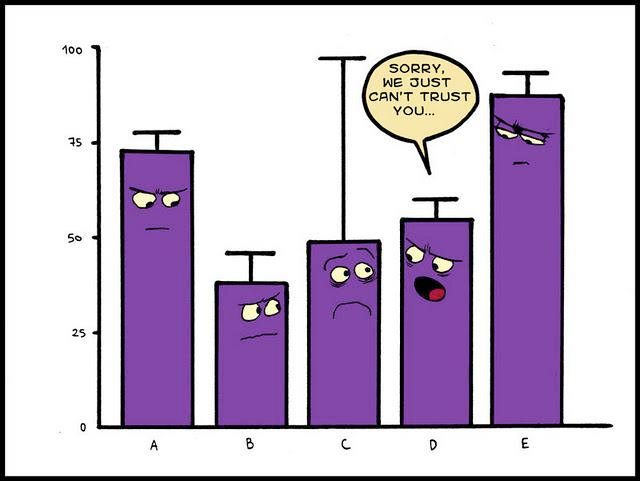

### Get dataset

First we will download the data from the [GEO](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE84896) website. You can download either raw or processed data. We will start with the raw data which is in [fasta](https://compgenomr.github.io/book/fasta-and-fastq-formats.html) format. I have already downloaded the raw files related to RNAseq gene expression profiling data generated from parental BT474 cells compared to BT474 persister cells generated from nine days of treatment with 2 uM lapatinib

*NOTE - to avoid a backlog on the head node with all of us downloading the same datasets, please make a softlinks to the files that I have already downloaded and stored them in our shared folder for later use:*

`ln -s /oasis/tscc/scratch/mstp2020/raw_data ~/raw_data`

Let's see if our softlink worked.

`cd ~/raw_data`<br>
`ls`

You should see the following files.

`
DMSO_1_ATCACG_L001_R1.fastq
DMSO_1_ATCACG_L002_R1.fastq
DMSO_2_CGATGT_L001_R1.fastq
DMSO_2_CGATGT_L002_R1.fastq
DTP_1_CAGATC_L001_R1.fastq
DTP_1_CAGATC_L002_R1.fastq
DTP_2_CCGTCC_L001_R1.fastq
DTP_2_CCGTCC_L002_R1.fastq
DTP_3_GTGAAA_L001_R1.fastq
DTP_3_GTGAAA_L002_R1.fastq
`

There are 10 files: sequencing reads from 2 lanes from 5 experiments--2 DMSO controls and 3 DTP treatments.

Let's take a look at how these files are formatted. Use **head** to print the first 10 lines

`head DMSO_1_ATCACG_L001_R1.fastq`

`@SRR3955801.sra.1 DJB775P1:373:D1AP7ACXX:1:1101:1324:2072 length=50
NTATGATTCCTCCTAGTGCACAACCACCACGCACTCAAACACCACCTCTG`<br>
`+SRR3955801.sra.1 DJB775P1:373:D1AP7ACXX:1:1101:1324:2072 length=50`<br>
`#1:AB;BDHHHGHHIIEBEGGIIIIIGGIGGHGG<GHIIGAHIIHIGGGG`<br>
`@SRR3955801.sra.2 DJB775P1:373:D1AP7ACXX:1:1101:1268:2121 length=50
TCTATCCTTTCGGAAAAAGGGACCAAATGCAACATAAAAATGTTTTCTCT`<br>
`+SRR3955801.sra.2 DJB775P1:373:D1AP7ACXX:1:1101:1268:2121 length=50
BC@FFFFFHHHHFJJJJJGHIJGHIIJIJGIIIIHIIJJGHGGHIJJJJI`<br>
`@SRR3955801.sra.3 DJB775P1:373:D1AP7ACXX:1:1101:1409:2193 length=50
CGTAAGTCTCCCTTCACCTGTTACAGAGTTTCAGATCGGTCACTGATAGT`<br>

FASTQ format is a common format to store sequencing data. Usually the FASTQ format uses four lines per sequence

**Line 1** begins with a '@' character and is followed by a sequence identifier and an optional description

**Line 2** is the raw sequence letters.

**Line 3** begins with a '+' character and is optionally followed by the same sequence identifier (and any description) again.

**Line 4** encodes the quality values for the sequence in Line 2, and must contain the same number of symbols as letters in the sequence. These quality scores are usually Phred scored which are formally defined as:
$Q = -10 \log_{10}\left( Prob. Of Error\right)$. However these scores are encoded with symbols per base and are represented as: 


<div align="center">Base quality score symbol = ASCII(Q + 33)</div>

### Combine fastq files

Typically reads from different lanes but from the same experiment are combined. Let's write a bash script to combine the fastq files from different rows using cat:

Let's make a directory in our scratch folder to store the combined fastq files we will be making.

`cd ~/scratch`

`mkdir fastq`

Let's move into the fastq directory and make a script to combine fastq files of different sequencing lanes

`cd fastq`

There are many different ways to do this but here is how I wrote my script:

`vi combine-fastq.sh`

`i`

`echo "combining DMSO_1_ATCACG..."`<br>
`cat ~/raw_data/DMSO_1_ATCACG* > DMSO_1_ATCACG.combined.fastq`<br>

`echo "combining DMSO_2_CGATGT..."`<br>
`cat ~/raw_data/DMSO_2_CGATGT* > DMSO_2_CGATGT.combined.fastq`<br>

`echo "combining DTP_1_CAGATC..."`<br>
`cat ~/raw_data/DTP_1_CAGATC* > DTP_1_CAGATC.combined.fastq`<br>

`echo "combining DTP_2_CCGTCC..."`<br>
`cat ~/raw_data/DTP_2_CCGTCC* > DTP_2_CCGTCC.combined.fastq`<br>

`echo "combining DTP_3_GTGAAA..."`<br>
`cat ~/raw_data/DTP_3_GTGAAA* > DTP_3_GTGAAA.combined.fastq`<br>

`esc`

`:wq!`

Now let's run the script we made for combining the files. We can either run with bash or by making our file executable

`bash combine-fastq.sh`

`chmod +x combine-fastq.sh`<br>
`./combine-fastq.sh`

If the script ran successfully, we should see 5 files with suffix combined.fastq:

`DMSO_1_ATCACG.combined.fastq`<br>
`DMSO_2_CGATGT.combined.fastq`<br>
`DTP_1_CAGATC.combined.fastq`<br>
`DTP_2_CCGTCC.combined.fastq`<br>
`DTP_3_GTGAAA.combined.fastq`<br>

### Run fastqc to check the quality of the reads we downloaded

Check that fastqc is installed (if you did installations it should be!). Run 

`which fastqc`

and your output should be:

<div align="center">~/miniconda3/bin/fastqc</div>

Let's make a directory in our projects folder to store our fastqc results:

`mkdir ~/scratch/fastqc`

Run fastqc to check the quality of your sequencing results. Remember to specify the full path of where your datasets are stored and where you want the processed data to end up. You will have to do this one one file at a time. REMEMBER TO USE TABS TO AVOID TYPOS! The -o argument is used to specify the location of the output files.


`fastqc ~/scratch/fastq/DMSO_1_ATCACG.combined.fastq -o ~/scratch/fastqc/`

#### Copy file outputs to your desktop so you can view the output in a web browser

*Windows users*

Follow these [instructions](https://docs.google.com/document/d/1Ew4n1ThHNumyBVqSRwMluDWHKDqfZBOAhrzMYJ4KrDM/edit?usp=sharing) to copy over the fastqc files:

*For Linux and Mac users*

Here is an example below. scp is a bash command, the syntax is always:

`scp sourcefile destinationfile`

This is the same syntax that you learned for cp (copy), but there is one added step for scp (secure copy). Since in this instance, the sourcefile is on tscc, you need to include your login information followed by a colon before the full path of the file you would like to move. 

On your local machine (NOT TSCC). Make a folder where you want this data to land and move into it. In this example, I am copying data into a folder on my desktop called mstp_bioinformatics. Keep in mind this folder must exist before you try to copy something into it. You can do this classically (e.g., right-clicking and creating a folder) or you can put your command-line expertise into use and create a folder with:

`mkdir ~/Desktop/mstp_bioinformatics` 

Now, open another terminal window and **DO NOT** log into TSCC. This ensures that you are running this command from your local machine which you want to copy files to (and NOT TSCC). Move to the folder where you want the files you are copying to end up:

`cd ~/Desktop/mstp_bioinformatics`

Now copy your files over:

`scp ucsd-train##@tscc-login.sdsc.edu:~/scratch/fastqc/*.html .`

Notice the * at the end of the line. This is a wild-card character. This will copy all files that have the same prefix. The destination file is simply “.” meaning the file that we are currently sitting in on our home computer. This is because we first moved into the directory where we want these files to be copied to.

The most common error message associated with this command will be that the file or destination does not exist. When possible, use tabs to make sure you are avoiding typos. Also copying and pasting directories directly works well. If you are getting this error, double-check what you wrote and/or that you copied the full path onto tscc.


If you want to see the fastqc output for all samples:

`scp -r ucsd-train48@tscc-login.sdsc.edu:/oasis/tscc/scratch/mstp2020/fastqc .`